# 【問題1】コンペティション内容の確認
コンペティションのOverviewページ読み、「Home Credit Default Risk」について以下の観点について確認してください。  

・何を学習し、何を予測するのか  
・どのようなファイルを作りKaggleに提出するか  
・提出されたものはどういった指標値で評価されるのか  
Image from Gyazo  
### 3.ベースラインモデルの作成  
まずは単純な方法による ベースラインモデル　を作成します。精度の基準となるモデルです。  

精度を高くする必要はありません。エラーなく実行でき、Kaggle側に推定値を提出できることを目指します。  

#### 【問１】・何を学習し、何を予測するのか ===> ローン申請者が債務能力があるかどうか。
#### 【問２】・どのようなファイルを作りKaggleに提出するか ===> テストデータセット内のSK_ID_CURRごとに、TARGET変数の確率を予測させたファイル。
#### 【問３】・提出されたものはどういった指標値で評価されるのか ===> 予測確率と観察された目標との間のROC曲線下の面積で評価される。

# 【問題2】学習と検証
データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行してください。  

検証にはこのコンペティションで使用される評価指標を用いるようにしてください。学習に用いる手法は指定しません。

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

In [2]:
pd.set_option('display.max_rows', 500) #表示する行名を省略しない
pd.set_option('display.max_columns', 150)# 表示する列名を省略しない

### # データの概要を確認

In [160]:
# データの概要を確認
df = pd.read_csv('application_train.csv')
display(len(df.columns))
test_df = pd.read_csv('application_test.csv')
display(len(test_df.columns))
display(df.head())
display(test_df.head())
display(df.shape)
display(test_df.shape)
display(df.describe())

122

121

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

(307511, 122)

(48744, 121)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### 欠損値を確認

In [5]:
# 欠損値を確認
df_missing = df.isnull().sum()
threshold=0
df_many_missing = df_missing[df_missing>threshold]
df_many_missing

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_M

### テストデータと訓練データに０，１labelを追加して結合

In [6]:
# テストデータと訓練データに０，１labelを追加して結合
df['label'] = 0
test_df['label'] = 1
data = pd.concat([df, test_df],axis=0)
print(type(data))
data = pd.DataFrame(data)
#連結したdataの概要を確認
display(data.shape)
print("連結したデータ")
display(data.head())
# print("Xデータ")
# display(X.head())
print("testデータ")
display(test_df.head())

C:\Users\ykenk\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


<class 'pandas.core.frame.DataFrame'>


(356255, 123)

連結したデータ


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE,HOUR_APPR_PROCESS_START,HOUSETYPE_MODE,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE,ORGANIZATION_TYPE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,label
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0247,0.0250,0.0252,0.0369,0.0369,0.0383,0,1.0,M,0.0143,0.0144,0.0144,-9461,-637,-2120,-1134.0,-3648.0,2.0,2.0,0.00,0.00,0.0000,No,0.0690,0.0690,0.0690,0.083037,0.262949,0.139376,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,N,Y,1,0,0.0833,0.0833,0.0833,0.1250,0.1250,0.1250,reg oper account,10,block of flats,0.0369,0.0375,0.0377,0,0,0.0202,0.0205,0.022,0.0190,0.0193,0.0198,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,0.0000,0.0000,0.0,0.0000,0.00,0.0,2.0,2.0,Laborers,Business Entity Type 3,NaN,0.018801,2,2,0,0,0,0,100002,1.0,0.0149,"Stone, brick",WEDNESDAY,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341,0
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0959,0.0968,0.0924,0.0529,0.0529,0.0538,0,2.0,F,0.0605,0.0608,0.0497,-16765,-1188,-291,-828.0,-1186.0,0.0,0.0,0.08,0.08,0.0806,No,0.0345,0.0345,0.0345,0.311267,0.622246,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,N,N,1,0,0.2917,0.2917,0.2917,0.3333,0.3333,0.3333,reg oper account,11,block of flats,0.0130,0.0132,0.0128,0,0,0.0773,0.0787,0.079,0.0549,0.0558,0.0554,Cash loans,Higher education,Married,House / apartment,State servant,Family,0.0039,0.0039,0.0,0.0098,0.01,0.0,1.0,1.0,Core staff,School,NaN,0.003541,1,1,0,0,0,0,100003,0.0,0.0714,Block,MONDAY,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040,0
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,M,NaN,NaN,NaN,-19046,-225,-2531,-815.0,-4260.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.555912,0.729567,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,Y,Y,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Revolving loans,Secondary / secondary special,Single / not married,H

testデータ


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,label
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,1
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary spe

### int,float型の欠損値を中央値に変換

In [7]:
# 欠損値を中央値に変換
data = data.fillna(data.median()) # 欠損値を中央値で穴埋め
display(data.isnull().sum())
display(data.dtypes)


AMT_ANNUITY                          0
AMT_CREDIT                           0
AMT_GOODS_PRICE                      0
AMT_INCOME_TOTAL                     0
AMT_REQ_CREDIT_BUREAU_DAY            0
AMT_REQ_CREDIT_BUREAU_HOUR           0
AMT_REQ_CREDIT_BUREAU_MON            0
AMT_REQ_CREDIT_BUREAU_QRT            0
AMT_REQ_CREDIT_BUREAU_WEEK           0
AMT_REQ_CREDIT_BUREAU_YEAR           0
APARTMENTS_AVG                       0
APARTMENTS_MEDI                      0
APARTMENTS_MODE                      0
BASEMENTAREA_AVG                     0
BASEMENTAREA_MEDI                    0
BASEMENTAREA_MODE                    0
CNT_CHILDREN                         0
CNT_FAM_MEMBERS                      0
CODE_GENDER                          0
COMMONAREA_AVG                       0
COMMONAREA_MEDI                      0
COMMONAREA_MODE                      0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_ID_PUBLISH                      0
DAYS_LAST_PHONE_CHANGE   

AMT_ANNUITY                     float64
AMT_CREDIT                      float64
AMT_GOODS_PRICE                 float64
AMT_INCOME_TOTAL                float64
AMT_REQ_CREDIT_BUREAU_DAY       float64
AMT_REQ_CREDIT_BUREAU_HOUR      float64
AMT_REQ_CREDIT_BUREAU_MON       float64
AMT_REQ_CREDIT_BUREAU_QRT       float64
AMT_REQ_CREDIT_BUREAU_WEEK      float64
AMT_REQ_CREDIT_BUREAU_YEAR      float64
APARTMENTS_AVG                  float64
APARTMENTS_MEDI                 float64
APARTMENTS_MODE                 float64
BASEMENTAREA_AVG                float64
BASEMENTAREA_MEDI               float64
BASEMENTAREA_MODE               float64
CNT_CHILDREN                      int64
CNT_FAM_MEMBERS                 float64
CODE_GENDER                      object
COMMONAREA_AVG                  float64
COMMONAREA_MEDI                 float64
COMMONAREA_MODE                 float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_ID_PUBLISH                   int64


In [8]:
#オブジェクト型の数を確認
display(data.select_dtypes('object').apply(pd.Series.nunique, axis = 0))

CODE_GENDER                    3
EMERGENCYSTATE_MODE            2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
NAME_CONTRACT_TYPE             2
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_INCOME_TYPE               8
NAME_TYPE_SUITE                7
OCCUPATION_TYPE               18
ORGANIZATION_TYPE             58
WALLSMATERIAL_MODE             7
WEEKDAY_APPR_PROCESS_START     7
dtype: int64

### object型をlabelEncoding変換

In [9]:
# LabelEncodingする
# objectを数値に変換する
# dataを変換

from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data:
    if data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data[col].unique())) <= 2:
            # Train on the training data
            le.fit(data[col])
            # Transform both training and testing data
            data[col] = le.transform(data[col])
            test_df[col] = le.transform(test_df[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


### one-hotエンコーディング

In [10]:
# one-hot encoding of categorical variables
data = pd.get_dummies(data)


print('Training Features shape: ', data.shape)


Training Features shape:  (356255, 244)


### trainデータとtestデータを分割する

In [11]:
df = data.query("label == 0")
test_df = data.query("label == 1")

### targetを抜き出す

In [12]:
X = df.drop('TARGET', axis=1)
Y = df['TARGET']

### X,test_dfの0、１ラベル付けした列を削除

In [13]:
X = X.drop('label', axis=1)
test_df = test_df.drop('label', axis=1)
print(X.shape)
print(test_df.shape)

(307511, 242)
(48744, 243)


### トレーニングデータとテストデータを揃え、両方のデータフレームに列のみを表示

In [14]:
# Align the training and testing data, keep only columns present in both dataframes
# トレーニングデータとテストデータを揃え、両方のデータフレームに列のみを表示
X, test_df = X.align(test_df, join = 'inner', axis = 1)

In [15]:
display(X.shape)
display(test_df.shape)

display(X.head())
display(test_df.head())

(307511, 242)

(48744, 242)

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,HOUR_APPR_PROCESS_START,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,...,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0247,0.0250,0.0252,0.0369,0.0369,0.0383,0,1.0,0.0143,0.0144,0.0144,-9461,-637,-2120,-1134.0,-3648.0,2.0,2.0,0.00,0.00,0.0000,0.0690,0.0690,0.0690,0.083037,0.262949,0.139376,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0.0833,0.0833,0.0833,0.1250,0.1250,0.1250,10,0.0369,0.0375,0.0377,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,HOUR_APPR_PROCESS_START,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,...,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,20560.5,568800.0,450000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0660,0.0666,0.0672,0.0590,0.0590,0.0612,0,2.0,0.0213,0.0210,0.0192,-19241,-2329,-812,-1740.0,-5170.0,0.0,0.0,0.00,0.00,0.0000,0.1379,0.1379,0.1379,0.752614,0.789654,0.159520,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0.1250,0.1250,0.1250,0.2083,0.2083,0.2083,18,0.0482,0.0487,0.0459,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### trainデータとtestデータに分割する

In [16]:
# trainデータとtestデータに分割する
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size=0.75)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(230633, 242)
(76878, 242)
(230633,)
(76878,)


### 4つの指標を出力する関数

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from IPython.display import HTML

In [18]:
def index_4(predict_train):
    print("Accuracyは：{}%".format((accuracy_score(Y_test, predict_train)*100))) # accuracy
    print("Precisionは：{:.2f}%".format((precision_score(Y_test, predict_train)*100))) # precision
    print("Recallは：{:.2f}%".format((recall_score(Y_test, predict_train)*100))) # recall
    print("F値は：{:.2f}".format(f1_score(Y_test, predict_train))) # F値
    print("混合行列は：\n{}".format(confusion_matrix(Y_test, predict_train))) # confusion_matrix
    

### ランダムフォレストで学習

In [19]:
# ランダムフォレストで学習させる
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf_rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=777)
clf_rf.fit(X_train,Y_train) #学習
rf_predict = clf_rf.predict(X_test) #X_testを使用し予測
display(rf_predict)

array([0., 0., 0., ..., 0., 0., 0.])

### 学習したランダムフォレストで訓練データを検証

In [20]:
print("ランダムフォレストにおける分類精度は：")
verification = index_4(rf_predict)
display(verification)

ランダムフォレストにおける分類精度は：
Accuracyは：91.91446187465854%
Precisionは：0.00%
Recallは：0.00%
F値は：0.00


C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


混合行列は：
[[70662     0]
 [ 6216     0]]


None

### ROC曲線をプロット

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, rf_predict)

0.5

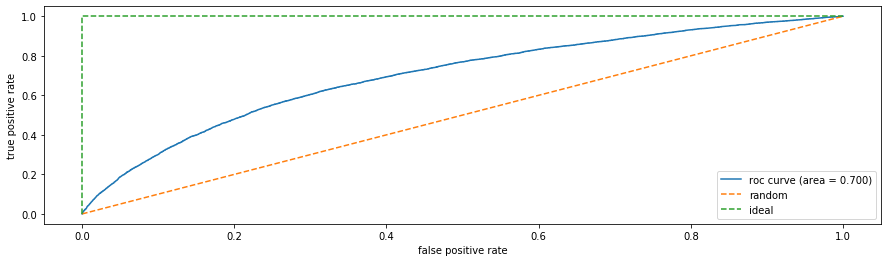

In [22]:
# AUCとROCを求めるのに必要
from sklearn.metrics import roc_curve, auc

# テストデータが「１」に属する確率（月収50万円以上に属する確率）
Y_score = clf_rf.predict_proba(X_test)[:, 1]
# ROCを求める
fpr, tpr, thresholds = roc_curve(y_true=Y_test, y_score=Y_score)

#グラフサイズ
plt.figure(figsize=(15,4))

# ROC曲線を描く（X軸がFPR、Y軸がTPR　※auc(fpr, tpr)でauc値を求めている
plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
#あてずっぽうの線
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
#AUCが１の場合の線
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')

# 凡例
plt.legend()
# 軸の名前
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [23]:
print('AUCロジスティック',auc(fpr, tpr))

AUCロジスティック 0.7001651396207522


# 【問題3】テストデータに対する推定
テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。  

正しく提出が行えていれば、精度は低くても構いません。  

### テストデータに対する推定

In [24]:
rf_predict_test = clf_rf.predict(test_df) #X_testを使用し推定
display(rf_predict_test)

array([0., 0., 0., ..., 0., 0., 0.])

#### 提出ファイルを作成

In [25]:
rf_predict_proba = clf_rf.predict_proba(test_df) # testデータで予測確率を出す
submit_predict_proba = pd.DataFrame(rf_predict_proba[:, 0])
new_submit_predict_proba = submit_predict_proba.rename(columns={0:'TARGET'})
new_submit_predict_proba.shape

(48744, 1)

In [26]:
#提出ファイルを作成
df_submit = pd.concat([test_df['SK_ID_CURR'], new_submit_predict_proba], axis=1)
# display(submit_pedict_proba)
display(df_submit.head())
display(df_submit.tail())

,SK_ID_CURR,TARGET
0,100001,0.916002
1,100005,0.910950
2,100013,0.922615
3,100028,0.929679
4,100038,0.901302


,SK_ID_CURR,TARGET
48739,456221,0.915147
48740,456222,0.916909
48741,456223,0.925299
48742,456224,0.929288
48743,456250,0.910184


In [27]:
df_submit.to_csv("submit_2.csv",index=False)

## 特徴量の重要度を見る

1   EXT_SOURCE_1   0.12224114703254474
2   EXT_SOURCE_2   0.09920881847233781
3   EXT_SOURCE_3   0.08361875615372542
4   DAYS_BIRTH   0.06770955836517417
5   NAME_INCOME_TYPE_Working   0.06452214961648624
6   NAME_EDUCATION_TYPE_Higher education   0.062469027465738375
7   AMT_GOODS_PRICE   0.05006769253906208
8   FLAG_EMP_PHONE   0.0407795699407935
9   REGION_RATING_CLIENT   0.03432043536706541
10   DAYS_LAST_PHONE_CHANGE   0.03023131053153719
11   REG_CITY_NOT_WORK_CITY   0.0264964310770001
12   REGION_RATING_CLIENT_W_CITY   0.02346253284246291
13   NAME_EDUCATION_TYPE_Secondary / secondary special   0.01852469249622137
14   DAYS_ID_PUBLISH   0.017492199122772622
15   REGION_POPULATION_RELATIVE   0.016495064581446183
16   OCCUPATION_TYPE_Laborers   0.015900489145475455
17   NAME_INCOME_TYPE_Pensioner   0.014743315558655448
18   CODE_GENDER_F   0.01465859028127821
19   TOTALAREA_MODE   0.014381195824877418
20   ORGANIZATION_TYPE_XNA   0.01259225116560622
21   DAYS_REGISTRATION   0.0120

C:\Users\ykenk\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


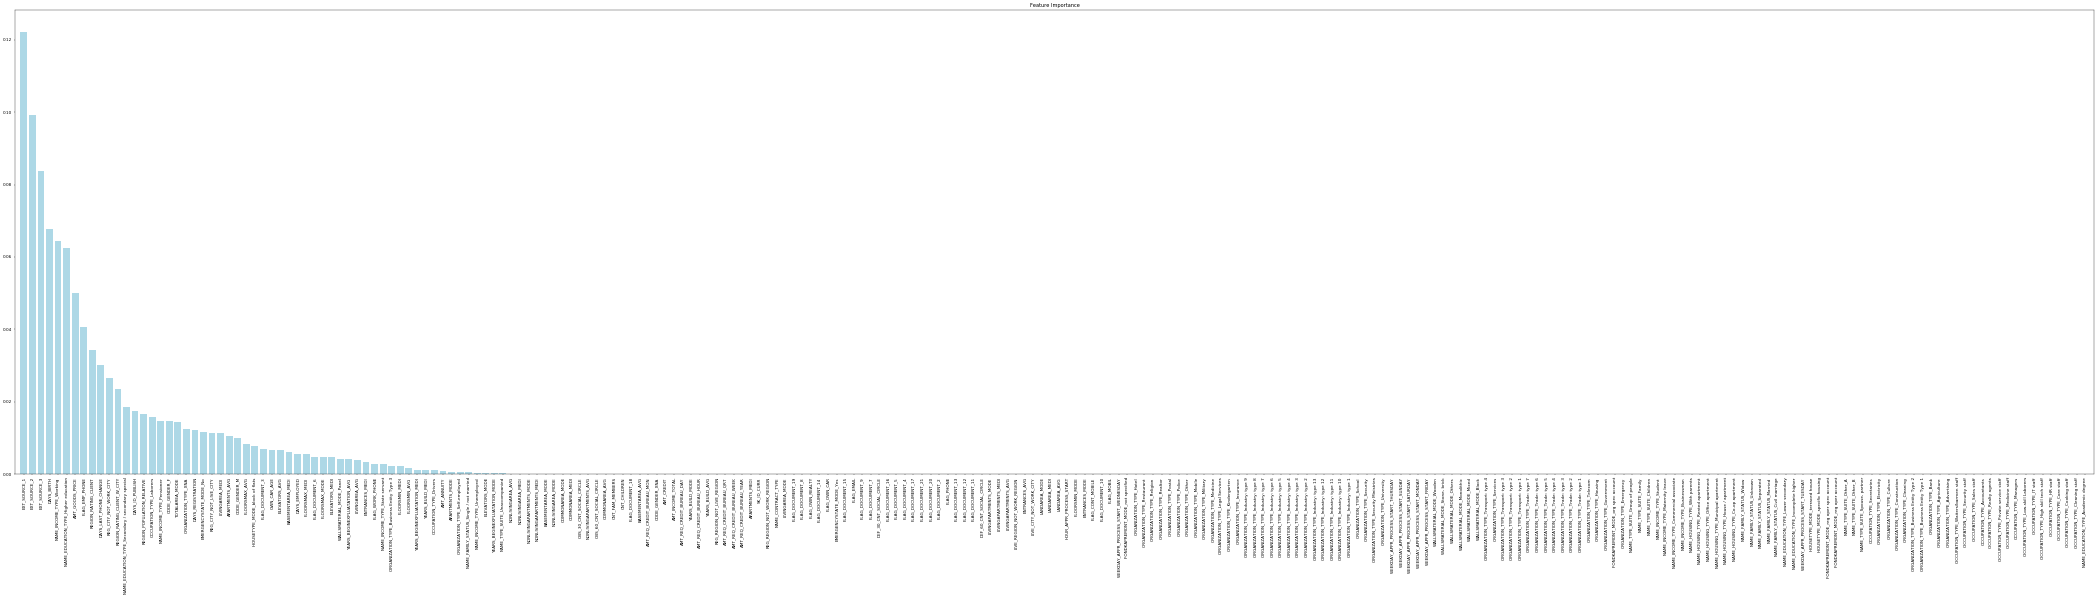

In [64]:
#特徴量の重要度
feature = clf_rf.feature_importances_

#特徴量の重要度を上から順に出力する
f = pd.DataFrame({'number': range(0, len(feature)),
             'feature': feature[:]})
f2 = f.sort_values('feature',ascending=False)
f3 = f2.ix[:, 'number']

#特徴量の名前
label = X_train.columns[0:]

#特徴量の重要度順（降順）
indices = np.argsort(feature)[::-1]

for i in range(len(feature)):
    print(str(i + 1) + "   " + str(label[indices[i]]) + "   " + str(feature[indices[i]]))

plt.figure(figsize=(70,20), dpi=30)
plt.title('Feature Importance')
plt.bar(range(len(feature)),feature[indices], color='lightblue', align='center')
plt.xticks(range(len(feature)), label[indices], rotation=90)
plt.xlim([-1, len(feature)])
plt.tight_layout()
plt.show()

In [53]:
# '''各特徴量の重要度を可視化
# '''
# def plot_feature_importances(model):
#     n_features = X.shape[1] # 全説明変数
#     plt.figure(figsize=(12,40))
#     plt.barh(range(n_features), model.feature_importances_, align='center') # 描画する際の枠組みを設定
#     plt.yticks(np.arange(n_features), X.columns) # 縦軸の設定
#     plt.xlabel('importances') # 横軸の設定
#     plt.ylabel('features') # 縦軸の設定
#     plt.show()
 
# # 実行
# plot_feature_importances(clf_rf)
 
# '''
# 特徴量の重要度から言えることは、「重要度の高い特徴量は、データを分割するのに有用である」ということだけで、「重要度が低い特徴量は不要」という訳ではない。
# なぜなら、偶然別の特徴量に同じ情報が含まれてしまっているケースもあるからだ。
# '''

# 【問題4】特徴量エンジニアリング
精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。  

・どの特徴量を使うか  
・どう前処理をするか  
何をした時に検証データに対する評価指標がどのようになったかをまとめてください。最低5パターンの学習・検証を行ってください。  
 
精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

### 4.特徴量エンジニアリング  
ベースラインモデルを元に、入力する特徴量に様々な工夫を行い精度を向上させていきます。  

### 【パターン１】ネットで見つけたBorutaを試してみる

#### サブミットデータを作る関数を作成

In [60]:
def submit_func(model, test_data, file_name): # 学習したモデル名、Validation、提出ファイル名
    
    # testデータで予測確率を出す
    predict_proba = model.predict_proba(test_data)
    
    # submitするために必要な予測確率を取得
    submit_predict_proba = pd.DataFrame(predict_proba[:, 0])
    
    #　取得した予測確率にヘッダ―を付ける
    new_submit_predict_proba = submit_predict_proba.rename(columns={0:'TARGET'})
    
    #　ID と予測確率のデータフレームを結合しsubmitファイルを作成
    df_submit = pd.concat([test_df['SK_ID_CURR'], new_submit_predict_proba], axis=1)
    
    # fail_nameを変数に格納
    last = file_name + ".csv"
    
    #submitファイルをcsvに変換
    df_submit.to_csv(last,index=False)


In [31]:
!pip install Boruta

In [32]:
from boruta import BorutaPy

rf = RandomForestClassifier(n_jobs=-1, max_depth=7)
feat_selector = BorutaPy(rf, n_estimators='auto', two_step=False,verbose=2, random_state=42)
# two_stepがない方、つまりBonferroniを用いたほうがうまくいく

# データの二度漬けになるので特徴量選択する際にもtestを含めてはいけない
feat_selector.fit(X_train.values, Y_train.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	242
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	242
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	242
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	242
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	242
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	242
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	242
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	242
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	242
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	242
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	242
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	242
Rejected: 	0
Iteration: 	13 / 100
Confirmed: 	32
Tentative: 	18
Rejected: 	192
Iteration: 	14 / 100
Confirmed: 	32
Tentative: 	18
Rejected: 	192
Iteration: 	15 / 100
Confirmed: 	32
Tentative: 	18
Rejected: 	192
Iteration: 	16 / 100
Confirmed: 	32
Tentati

BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=116, n_jobs=-1,
            oob_score=False,
            random_state=<mtrand.RandomState object at 0x0000023082AA06C0>,
            verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x0000023082AA06C0>,
     two_step=False, verbose=2)

#### Borutaは重要な特徴量を32個選んだ。データを選んだ特徴量だけにして検証してみる。

In [145]:
X_train_selected = X_train.iloc[:,feat_selector.support_]
X_test_selected = X_test.iloc[:,feat_selector.support_]

In [146]:
#抽出した32個のカラムを変数に格納し、test_dfにも対応させる
ext_col = X_train_selected.columns
new_ext_col = ext_col.values
test_df_1 = test_df[new_ext_col] # test_dfから32個の特徴量を抽出

In [148]:
# Borutaで抽出した特徴量で学習
rf_1=RandomForestClassifier(
    n_estimators=500,
    random_state=42
)
rf_1.fit(X_train_selected.values, Y_train.values)

print(rf_1.classes_)
print(confusion_matrix(Y_test.values,rf_1.predict(X_test_selected.values),labels=rf.classes_))

[0. 1.]
[[70643    19]
 [ 6182    34]]


#### 検証

In [149]:
#5つの指標を出力する関数を定義する
def index_4_boruta(predict_train, data_name):
    
    ind_5 = {"Accuracy" : [accuracy_score(Y_test, predict_train)*100],
            "Precision" : [precision_score(Y_test, predict_train)*100],
            "Recall" : [recall_score(Y_test, predict_train)*100],
            "F1" : [f1_score(Y_test, predict_train)],
            "ConfusionMatrix" : [confusion_matrix(Y_test, predict_train)]
            }
    index1 = [data_name]
    all = pd.DataFrame(data=ind_5, index=index1)
    
    return all

In [150]:
predict_boruta = rf_1.predict(X_test_selected.values)

In [151]:
index_4_boruta(predict_boruta,'Boruta')

,Accuracy,Precision,Recall,F1,ConfusionMatrix
Boruta,91.933973,64.150943,0.546976,0.010847,"[[70643, 19], [6182, 34]]"


#### submit

In [152]:
#submitデータをcsvに変換
submit_func(rf_1, test_df_1, 'submit_boruta')

### 【パターン２】重要度の高い特徴量に絞って学習・検証する

#### 30の特徴量に絞る

In [108]:
#特徴量の重要度
feature = clf_rf.feature_importances_

#特徴量の重要度を上から順に出力する
f = pd.DataFrame({'number': range(0, len(feature)),
             'feature': feature[:]})
f2 = f.sort_values('feature',ascending=False)
f3 = f2.ix[:, 'number']

#特徴量の名前
label = X_train.columns[0:]

#特徴量の重要度順（降順）
indices = np.argsort(feature)[::-1]

for i in range(len(feature[:30])):
    print(str(i + 1) + "   " + str(label[indices[i]]) + "   " + str(feature[indices[i]]))

1   EXT_SOURCE_1   0.12224114703254474
2   EXT_SOURCE_2   0.09920881847233781
3   EXT_SOURCE_3   0.08361875615372542
4   DAYS_BIRTH   0.06770955836517417
5   NAME_INCOME_TYPE_Working   0.06452214961648624
6   NAME_EDUCATION_TYPE_Higher education   0.062469027465738375
7   AMT_GOODS_PRICE   0.05006769253906208
8   FLAG_EMP_PHONE   0.0407795699407935
9   REGION_RATING_CLIENT   0.03432043536706541
10   DAYS_LAST_PHONE_CHANGE   0.03023131053153719
11   REG_CITY_NOT_WORK_CITY   0.0264964310770001
12   REGION_RATING_CLIENT_W_CITY   0.02346253284246291
13   NAME_EDUCATION_TYPE_Secondary / secondary special   0.01852469249622137
14   DAYS_ID_PUBLISH   0.017492199122772622
15   REGION_POPULATION_RELATIVE   0.016495064581446183
16   OCCUPATION_TYPE_Laborers   0.015900489145475455
17   NAME_INCOME_TYPE_Pensioner   0.014743315558655448
18   CODE_GENDER_F   0.01465859028127821
19   TOTALAREA_MODE   0.014381195824877418
20   ORGANIZATION_TYPE_XNA   0.01259225116560622
21   DAYS_REGISTRATION   0.0120

C:\Users\ykenk\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [110]:
#重要度の高い３０の特徴量を抽出する

#30個の特徴量を変数に格納
new_features = []
for i in range(len(feature[:30])):
    new_features.append(str(label[indices[i]]))

#new_featuresをデータフレーム化
df_30 = df.loc[:, new_features]

#testdataも変更
test_df_30 = test_df.loc[:, new_features]

# テストデータと訓練データに０，１labelを追加して結合
df_30['label'] = 0
test_df_30['label'] = 1
data_30 = pd.concat([df_30, test_df_30],axis=0)

#連結したdataのtypeを確認
df_30.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 31 columns):
EXT_SOURCE_1                                         307511 non-null float64
EXT_SOURCE_2                                         307511 non-null float64
EXT_SOURCE_3                                         307511 non-null float64
DAYS_BIRTH                                           307511 non-null int64
NAME_INCOME_TYPE_Working                             307511 non-null uint8
NAME_EDUCATION_TYPE_Higher education                 307511 non-null uint8
AMT_GOODS_PRICE                                      307511 non-null float64
FLAG_EMP_PHONE                                       307511 non-null int64
REGION_RATING_CLIENT                                 307511 non-null int64
DAYS_LAST_PHONE_CHANGE                               307511 non-null float64
REG_CITY_NOT_WORK_CITY                               307511 non-null int64
REGION_RATING_CLIENT_W_CITY                          3

In [135]:
#欠損値を中央値で埋める
data_30 = data_30.fillna(data_30.median())

#testdataとtraindataを分けて0,1のラベルを削除
df_30 = data_30.query('label==0')
test_df_30 = data_30.query('label==1')
df_30 = df_30.drop('label', axis=1)
test_df_30 = test_df_30.drop('label', axis=1)

#### train_test_sprit

In [136]:
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(df_30, Y,train_size=0.75)

C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### RFで学習、推定

In [130]:
#5つの指標を出力する関数を定義する
def index_4_30(predict_train, data_name):
    
    ind_5 = {"Accuracy" : [accuracy_score(y_test_30, predict_train)*100],
            "Precision" : [precision_score(y_test_30, predict_train)*100],
            "Recall" : [recall_score(y_test_30, predict_train)*100],
            "F1" : [f1_score(y_test_30, predict_train)],
            "ConfusionMatrix" : [confusion_matrix(y_test_30, predict_train)]
            }
    index1 = [data_name]
    all = pd.DataFrame(data=ind_5, index=index1)
    
    return all

In [138]:
clf_rf_30 = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf_rf_30.fit(X_train_30,y_train_30) #学習
rf_predict_30 = clf_rf_30.predict(X_test_30) #X_testを使用し予測

print("ランダムフォレストにおける分類精度は：")
verification_30 = index_4_30(rf_predict_30, 'rf_predict_30')
display(verification_30)

ランダムフォレストにおける分類精度は：


C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Accuracy,Precision,Recall,F1,ConfusionMatrix
rf_predict_30,91.829912,0.0,0.0,0.0,"[[70597, 0], [6281, 0]]"


#### submit

In [153]:
#submitデータをcsvに変換
submit_func(clf_rf_30, test_df_30, 'submit_30features')

### 【パターン３】欠損値のある列を削除する

In [154]:
#train,testを連結させたデータで欠損値のある列を削除する
data_0 = data_30.dropna(how='any', axis=1)

#testdataとtraindataを分けて0,1のラベルを削除
df_0 = data_0.query('label==0')
test_df_0 = data_0.query('label==1')
df_0 = df_0.drop('label', axis=1)
test_df_0 = test_df_0.drop('label', axis=1)

#### train_test_sprit

In [155]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(df_0, Y, train_size=0.75)

C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


#### RFで学習、推定

In [156]:
#5つの指標を出力する関数を定義する
def index_4_0(predict_train, data_name):
    
    ind_5 = {"Accuracy" : [accuracy_score(y_test_0, predict_train)*100],
            "Precision" : [precision_score(y_test_0, predict_train)*100],
            "Recall" : [recall_score(y_test_0, predict_train)*100],
            "F1" : [f1_score(y_test_0, predict_train)],
            "ConfusionMatrix" : [confusion_matrix(y_test_0, predict_train)]
            }
    index1 = [data_name]
    all = pd.DataFrame(data=ind_5, index=index1)
    
    return all

In [157]:
clf_rf_0 = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
clf_rf_0.fit(X_train_0, y_train_0) #学習
rf_predict_0 = clf_rf_0.predict(X_test_0) #X_testを使用し予測

print("ランダムフォレストにおける分類精度は：")
verification_0 = index_4_0(rf_predict_0, 'rf_predict_0')
display(verification_0)

ランダムフォレストにおける分類精度は：


C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Accuracy,Precision,Recall,F1,ConfusionMatrix
rf_predict_0,91.759671,0.0,0.0,0.0,"[[70543, 0], [6335, 0]]"


#### submit

In [158]:
#submitデータをcsvに変換
submit_func(clf_rf_0, test_df_0, 'submit_Missing value removal')

### 【パターン４】新しい特徴量を作ってみる(kernel参照）

In [177]:
df['CODE_GENDER'].unique()

array(['M', 'F', nan], dtype=object)

In [178]:
df.loc[df['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].unique()

array([365243], dtype=int64)

In [179]:
sum(df['ORGANIZATION_TYPE'] == 'XNA')

55374

In [180]:
df['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [181]:
df['CODE_GENDER'].replace('XNA',np.nan, inplace=True)
df['CODE_GENDER'].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [182]:
df['DAYS_LAST_PHONE_CHANGE'].replace(0, np.nan, inplace=True)

In [185]:
data_30.shape

(356255, 31)

In [189]:
df.shape

(307511, 136)

In [194]:
data_30['annuity_income_percentage'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL'] # 年金と総収入
data_30['car_to_birth_ratio'] = df['OWN_CAR_AGE'] / df['DAYS_BIRTH'] # 車の年式と年齢
data_30['car_to_employ_ratio'] = df['OWN_CAR_AGE'] / df['DAYS_EMPLOYED'] # 車の年式と労働期間
data_30['children_ratio'] = df['CNT_CHILDREN'] / df['CNT_FAM_MEMBERS'] # 子供の人数と家族の人数
data_30['credit_to_annuity_ratio'] = df['AMT_CREDIT'] / df['AMT_ANNUITY'] # 総借入と年金ローン
data_30['credit_to_goods_ratio'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE'] # 総借入とローンで買う予定の品物
data_30['credit_to_income_ratio'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL'] # 総借入と収入
data_30['income_credit_percentage'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT'] # 収入と総借入
data_30['days_employed_percentage'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH'] # 労働期間と年齢
data_30['income_per_child'] = df['AMT_INCOME_TOTAL'] / (1 + df['CNT_CHILDREN']) # 収入と子供の人数
data_30['income_per_person'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS'] # 収入と家族の人数
data_30['payment_rate'] = df['AMT_ANNUITY'] / df['AMT_CREDIT'] # 年金ローンと総借入
# df['phone_to_birth_ratio'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_BIRTH']
# df['phone_to_employ_ratio'] = df['DAYS_LAST_PHONE_CHANGE'] / df['DAYS_EMPLOYED']

In [198]:
#欠損値を確認
data_30.isnull().sum()

EXT_SOURCE_1                                              0
EXT_SOURCE_2                                              0
EXT_SOURCE_3                                              0
DAYS_BIRTH                                                0
NAME_INCOME_TYPE_Working                                  0
NAME_EDUCATION_TYPE_Higher education                      0
AMT_GOODS_PRICE                                           0
FLAG_EMP_PHONE                                            0
REGION_RATING_CLIENT                                      0
DAYS_LAST_PHONE_CHANGE                                    0
REG_CITY_NOT_WORK_CITY                                    0
REGION_RATING_CLIENT_W_CITY                               0
NAME_EDUCATION_TYPE_Secondary / secondary special         0
DAYS_ID_PUBLISH                                           0
REGION_POPULATION_RELATIVE                                0
OCCUPATION_TYPE_Laborers                                  0
NAME_INCOME_TYPE_Pensioner              

#### 欠損値を中央値で埋める

In [205]:
#欠損値を中央値で埋める
new_data_30 = new_data_30.fillna(new_data_30.median())

#testdataとtraindataを分けて0,1のラベルを削除
df_30_new = new_data_30.query('label==0')
test_df_30_new = new_data_30.query('label==1')

df_30_new = df_30_new.drop('label', axis=1)
test_df_30_new = test_df_30_new.drop('label', axis=1)

#### train_test_split

In [206]:
X_train_30_new, X_test_30_new, y_train_30_new, y_test_30_new = train_test_split(df_30_new, Y,train_size=0.75)

C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [207]:
#5つの指標を出力する関数を定義する
def index_4_new(predict_train, data_name):
    
    ind_5 = {"Accuracy" : [accuracy_score(y_test_30_new, predict_train)*100],
            "Precision" : [precision_score(y_test_30_new, predict_train)*100],
            "Recall" : [recall_score(y_test_30_new, predict_train)*100],
            "F1" : [f1_score(y_test_30_new, predict_train)],
            "ConfusionMatrix" : [confusion_matrix(y_test_30_new, predict_train)]
            }
    index1 = [data_name]
    all = pd.DataFrame(data=ind_5, index=index1)
    
    return all

In [209]:
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf_rf.fit(X_train_30_new,y_train_30_new) #学習
rf_predict_new = clf_rf.predict(X_test_30_new) #X_testを使用し予測

print("ランダムフォレストにおける分類精度は：")
verification_new = index_4_new(rf_predict_new, 'rf_predict_30')
display(verification_new)

ランダムフォレストにおける分類精度は：


C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Accuracy,Precision,Recall,F1,ConfusionMatrix
rf_predict_30,92.053643,0.0,0.0,0.0,"[[70769, 0], [6109, 0]]"


#### submit

In [211]:
#submitデータをcsvに変換
submit_func(clf_rf, test_df_30_new, 'new_features')

### 【パターン５】標準化（特徴量を重要度の高い30個に絞ったモデルを使用）

In [212]:
# X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(df_30, Y,train_size=0.75)

In [213]:
#標準化処理を行う
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train_30)

X_train_transformed = scaler.transform(X_train_30)
X_test_transformed = scaler.transform(X_test_30)

C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ykenk\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\ykenk\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


#### RFで学習、推定

In [215]:
#5つの指標を出力する関数を定義する
def index_4_std(predict_train, data_name):
    
    ind_5 = {"Accuracy" : [accuracy_score(y_test_30, predict_train)*100],
            "Precision" : [precision_score(y_test_30, predict_train)*100],
            "Recall" : [recall_score(y_test_30, predict_train)*100],
            "F1" : [f1_score(y_test_30, predict_train)],
            "ConfusionMatrix" : [confusion_matrix(y_test_30, predict_train)]
            }
    index1 = [data_name]
    all = pd.DataFrame(data=ind_5, index=index1)
    
    return all

In [217]:
clf_rf_std = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf_rf_std.fit(X_train_transformed,y_train_30) #学習
rf_predict_std = clf_rf_std.predict(X_test_transformed) #X_testを使用し予測

print("ランダムフォレストにおける分類精度は：")
verification_std = index_4_std(rf_predict_std, 'rf_predict_std')
display(verification_std)

ランダムフォレストにおける分類精度は：


C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Accuracy,Precision,Recall,F1,ConfusionMatrix
rf_predict_std,91.829912,0.0,0.0,0.0,"[[70597, 0], [6281, 0]]"


#### submit

In [218]:
#submitデータをcsvに変換
submit_func(clf_rf_std, test_df_30, 'submit_std')

## 比較

In [220]:
verification_boruta = index_4_boruta(predict_boruta,'Boruta')
verification_30 = index_4_30(rf_predict_30, '特徴量30個')
verification_0 = index_4_0(rf_predict_0, '欠損値を0埋め')
verification_new = index_4_new(rf_predict_new, '特徴量を新しく作る')
verification_std = index_4_std(rf_predict_std, '標準化')

pd.concat([verification_boruta, verification_30, verification_0, verification_new, verification_std])

C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undef

,Accuracy,Precision,Recall,F1,ConfusionMatrix
Boruta,91.933973,64.150943,0.546976,0.010847,"[[70643, 19], [6182, 34]]"
特徴量30個,91.829912,0.000000,0.000000,0.000000,"[[70597, 0], [6281, 0]]"
欠損値を0埋め,91.759671,0.000000,0.000000,0.000000,"[[70543, 0], [6335, 0]]"
特徴量を新しく作る,92.053643,0.000000,0.000000,0.000000,"[[70769, 0], [6109, 0]]"
標準化,91.829912,0.000000,0.000000,0.000000,"[[70597, 0], [6281, 0]]"
